# scikit-learnを用いた機械学習
- scikit-learnはPythonの機械学習ライブラリです．
- オープンソースで誰でも無償利用可能です．
- 特に，<b>多くのライブラリを同じ使い方で使える</b>という点が大変優れています．
  - Javaのポリモーフィズムをイメージしてください．
  - アルゴリズムAも，BもCも，使うだけなら全部インスタンス化して.fit()，.predict()するだけ！
- ということで，本日はアルゴリズムの種類はよくわからないけど，ブラックボックス的に様々なAIを使ってみる！という体験をしてみましょう．
- 図で示すと以下のような感じです．

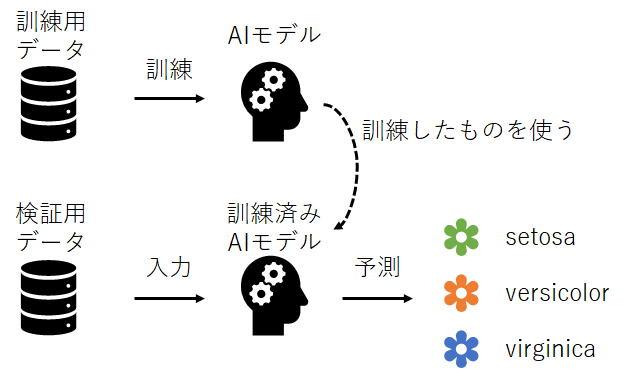

In [ ]:
##########################################
#  まずは必要なライブラリをimportする．
##########################################
# pandasをpdとしてimportする．
import pandas as pd
# 機械学習ライブラリsklearnからdatasetsをimportする．
from sklearn import datasets

# irisデータをロード
iris = datasets.load_iris()
# irisはクラスなので，iris.dataをDataFrameに変換する．
X = pd.DataFrame(iris.data, columns=["sepalLen", "sepalWid", "petalLen", "petalWid"])
# 分類対象はyとしておく
y = iris.target_names[iris.target]
# 上5行を表示する．
print(X.head())  # .head()で，DataFrameの上５行を表示できる．
print(y[:5])  # yはnumpy配列なので，スライシングで表示する．

   sepalLen  sepalWid  petalLen  petalWid
0       5.1       3.5       1.4       0.2
1       4.9       3.0       1.4       0.2
2       4.7       3.2       1.3       0.2
3       4.6       3.1       1.5       0.2
4       5.0       3.6       1.4       0.2
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# 機械学習を試してみよう
機械学習は理論を構築するとなると容易ではないが，使うだけであれば近年の充実したライブラリのおかげで非常に容易である．本講義では，まず機械学習を使えるようになってから，理論に進んでいこうと思う．

## 教師あり学習

教師あり学習は{特徴量ベクト, 教師ラベル}のペアの集合体（データセット）を元に分類や回帰のルールを自動で学習する手法である．今回の場合，{X, y}となる．学習アルゴリズムは様々なものがある．
- ニューラルネットワーク (NN: Neural Network)
- ナイーブベイズ (NB: Naive Bayes)
- 決定木 (DT: Decision Tree)
- ランダムフォレスト (RF: Random Forest)
- サポートベクターマシン (SVM: Support Vector Machine)

## パーセプトロンを試す
はじめに，ニューラルネットワークの元となった基本アルゴリズムパーセプトロン（Perceptron）を使ってみよう．アルゴリズムの名称は今回気にしなくても良い．とりあえずは，アルゴリズムAをブラックボックス的に使ってみましょう．

In [ ]:
# Perceptronというアルゴリズムをimportする．
from sklearn.linear_model import Perceptron

# 1. パーセプトロンのインスタンスを生成する．引数はハイパーパラメータだが気にしなくてよい．
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)

# 2. 訓練データ{X, y}を用いて，モデルを訓練する．
ppn.fit(X, y)           

# 3. 訓練済みのモデルppnを用いて，花の種類をXから予測してみる．
y_pred = ppn.predict(X)

# 推定精度の表示
print('誤分類:%d' % (y != y_pred).sum())
print('正解率: %.2f' % ((y == y_pred).sum()/len(y)))

誤分類:78
正解率: 0.48


## scikit-learnを用いた教師あり学習プログラミング
### AIモデル開発の流れ
上の図で示した通り，AIは使ってみるだけならば以下の3手順でプログラミングできてしまう．

1. モデルをインスタンス化する（Pythonはnewとか要らない）．
    ```python:test.py
    ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)
    ```
  - 1のインスタンス化時の引数は，学習の効率に影響するパラメータ，即ち，人為的に調整が可能な係数（ハイパーパラメータ）である．
  - パラメータはアルゴリズムの理論を理解しないと意味が分からないため，機会があれば調べてみてほしい．
2. 訓練データでモデルを訓練する
    ```python:test.py
    ppn.fit(X, y)
    ```
3. 訓練済みモデルで検証データの予測結果を求める．
    ```python:test.py
    y_pred = ppn.predict(X)
    ```
  - 学習が完了したモデルppnを用いて，もう一度入力特徴量Xを与えて予測を行ってみる．
  - この時，教師ラベルyは与えない点に着目してほしい．一度学習を行えば，正解が未知の入力が与えられたときに予測が実践できるということを確認している．

### 予測精度の評価
- 詳細な説明は次週行うが，シンプルに予測結果と正解ラベルが一致しているか？を精度と呼び，これで評価をしてみよう．
  ```python:test.py
  (y == y_pred).sum()/len(y)
  ```
    - 分類精度の評価は教師ラベルyとどれだけ一致したかとなるため，正解率は上記で算出できる．
    - (y == y_pred)は教師ラベルと予測結果の一致を確認しており，boolean配列となる．
    - これを.sum()することでTrueを1と見立てた加算が行われる．
    - それをlen(y)，即ち教師ラベルの数で割ると正解率となる．

## 様々なアルゴリズムを試す
- 前述の通り，scikit-learnに実装されているアルゴリズムは，基本同じように使うことができる．
- したがって，アルゴリズムAだろうがBだろうが，上述の3行で（1行目のインスタンスだけ変えて）実行できる．
- せっかくなので，色々なアルゴリズムを試してみよう．

In [ ]:
# Neural Networkは別名Multi layer perceptron（多層パーセプトロン）
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X, y)
y_pred = nn.predict(X)
print('Neural Network \t accuracy:%.2f' % ((y == y_pred).sum()/len(y)) )

# GaussianNBはガウス分布ベースのNaive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X, y)
y_pred = nb.predict(X)
print('Naive Bayes \t accuracy:%.2f' % ((y == y_pred).sum()/len(y)) )

# Decision Tree 決定木
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
y_pred = dt.predict(X)
print('Decision Tree \t accuracy:%.2f' % ((y == y_pred).sum()/len(y)) )

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X, y)
y_pred = rf.predict(X)
print('Random Forest \t accuracy:%.2f' % ((y == y_pred).sum()/len(y)) )

# SVM : Support Vector Machine の Classification（分類）なのでSVC
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X, y)
y_pred = svm.predict(X)
print('SVM       \t accuracy:%.2f' % ((y == y_pred).sum()/len(y)) )

Neural Network 	 accuracy:0.33
Naive Bayes 	 accuracy:0.96
Decision Tree 	 accuracy:1.00
Random Forest 	 accuracy:0.97
SVM       	 accuracy:0.99


## 学習データと検証データ
とうとう推定精度100%を達成してしまったがちょっとまってほしい．

現状では{X, y}のペアを学習して，{X, ?}を予測しており，既に学習したことのあるデータで予測を行っている．即ち，テストの問題を事前にカンニングして高い点数を取っているのと同じなのである．そこで，モデルの検証を行う方法として，データセットを学習データと検証データに分割するという方法がある．この方法では，データセットの9割を学習用に，1割を検証用に事前に分割し，検証用データの推定精度を用いてモデルの検証を行う．

ただし，分割の際には先頭15個：残り135個のような分割を行うのはよろしくない．yを見てみるとわかるが，これだとsetosaが15個と残り135個のデータに分割されてしまい，クラスが非常に偏ってしまう．一般的にこのようなケースでは**ランダムサンプリング**することで対応を行う．もしくは，クラスの偏りを考慮したランダムサンプリングを行う．

やってみよう．

In [ ]:
import random

# 単純なランダムサンプリング
size = len(X)
# random.sample(選択の範囲, 選択する数)→今回は0～size-1をランダム順に全て取得している．
indexes = random.sample(range(size), size)
# ランダム順なので，先頭1割を検証用indexに，残りを学習用indexにする．
test = indexes[:(int)(size/10)]
train = indexes[(int)(size/10):]

# XはDataFrame型なので.iloc[index]で，yはnumpy型配列なのでスライシングで分割を記述する．
X_train, y_train = X.iloc[train], y[train]
X_test, y_test = X.iloc[test], y[test]

print(X_test, y_test)

     sepalLen  sepalWid  petalLen  petalWid
90        5.5       2.6       4.4       1.2
79        5.7       2.6       3.5       1.0
91        6.1       3.0       4.6       1.4
137       6.4       3.1       5.5       1.8
34        4.9       3.1       1.5       0.2
110       6.5       3.2       5.1       2.0
95        5.7       3.0       4.2       1.2
122       7.7       2.8       6.7       2.0
93        5.0       2.3       3.3       1.0
128       6.4       2.8       5.6       2.1
81        5.5       2.4       3.7       1.0
149       5.9       3.0       5.1       1.8
99        5.7       2.8       4.1       1.3
45        4.8       3.0       1.4       0.3
85        6.0       3.4       4.5       1.6 ['versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor']


In [ ]:
# 続いて，学習フェーズ，予測フェーズに分割してモデルを評価してみよう．

# 1. Perceptronインスタンスの生成
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True)

# 2. 訓練データ{X_train, y_train}を用いてモデルを訓練
ppn.fit(X_train, y_train)

# 3. 検証データX_testに対して予測
y_pred = ppn.predict(X_test)

# 精度算出
print('Perceptron \t accuracy:%.2f' % ((y_test == y_pred).sum()/len(y_test)) )

Perceptron 	 accuracy:0.60


In [ ]:
# そろそろ，同じ記述を何度も書くのが嫌なので，sklearnの「全て同じように使える」という利点を活かしていこう．

# 学習モデルを辞書型｛名前:中身｝で保持する．Key-ValueペアとかHashMap的なものである．
ESTIMATORS = {"Perceptron": Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True),
              "Neural Network": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
              "Naive Bayes": GaussianNB(),
              "Decision Tree": DecisionTreeClassifier(),
              "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
              "SVM       ": SVC(gamma='auto')}

# ESTIMATORS全てに対して，以下を実施する．
for name, clf in ESTIMATORS.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s \t accuracy:%.2f' % (name, (y_test == y_pred).sum()/len(y_test)) )

Perceptron 	 accuracy:0.60
Neural Network 	 accuracy:0.13
Naive Bayes 	 accuracy:1.00
Decision Tree 	 accuracy:1.00
Random Forest 	 accuracy:1.00
SVM        	 accuracy:1.00


## 交差検証
上記によって，カンニングは防止することができたが，150個のデータのうち，15個でしか評価していない．すると以下のような課題が残る．
- ランダムの15個が偏ってたまたま高い精度になったのでは？
- 15個だけって評価材料が少なくない？

だからといって，検証用データの比率を増加させると，「機械学習は学習データが多いほど高い精度となる」に反するため，本来の能力を計測できているとはいいがたい．

そこで，データセットを無駄なく使ってモデルを評価する手法として，交差検証（Cross Validation）がある．ここではthe most populerな10-fold CVを例に，交差検証の方法を説明する．

1. データセットをランダムサンプリングにより10分割する（サブセットA～Jとする）．
1. Aを検証用に，残りを学習用にして，Aに対する予測結果を出力する（pred<sub>A</sub>とする）．
1. Bを検証用に，同上する．
1. …と10セット全てに対して実施する（pred<sub>A</sub>～pred<sub>J</sub>）．
1. これらを結合したpred<sub>A2J</sub>と，対応する教師ラベルy<sub>A2J</sub>を用いて全体の精度評価とする．

In [ ]:
# 交差検証は自分で実装してもよいが便利なクラスが既に用意されている．
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)

# skfは各クラスの比率を元のデータセットと同じにしながらK-foldするクラスである．
# 例えばclf=RandomForest()を評価してみよう．
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
result = pd.DataFrame() # ここに結果を残そう．
for train, test in skf.split(X, y):
    clf.fit(X.iloc[train], y[train])
    y_pred = clf.predict(X.iloc[test])
    result = result.append(pd.DataFrame({"y": y[test], "pred": y_pred}), ignore_index=True)
print('Random Forest \t accuracy:%.2f' % ((result["y"] == result["pred"]).sum()/len(result)) )

Random Forest 	 accuracy:0.95


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)

# ESTIMATORS全てに対して，以下を実施する．
for name, clf in ESTIMATORS.items():
    result = pd.DataFrame() # ここに結果を残そう．
    # skfは各クラスの比率を元のデータセットと同じにしながらK-foldするクラスである．
    for train, test in skf.split(X, y):
        clf.fit(X.iloc[train], y[train])
        y_pred = clf.predict(X.iloc[test])
        result = result.append(pd.DataFrame({"y": y[test], "pred": y_pred}), ignore_index=True)
    print('%s \t accuracy:%.2f' % (name, (result["y"] == result["pred"]).sum()/len(result)) )


Perceptron 	 accuracy:0.82
Neural Network 	 accuracy:0.33
Naive Bayes 	 accuracy:0.96
Decision Tree 	 accuracy:0.94
Random Forest 	 accuracy:0.95
SVM        	 accuracy:0.97


# 練習問題1
1. 下記を参考にdigitsデータセットをロードし，後ろから300件を検証用データに，残りを訓練データにして教師あり学習を行い，推定精度を評価せよ．全てのアルゴリズムを検証せよ．
1. digitsデータセットは4bitグレースケールのようで，[0, 16]の整数値を取る．すなわち，16で割れば簡易的にMIN-MAX正規化と同等の働きになる．これを行った上で，推定精度を再度評価せよ．

(1797, 64)


<Figure size 432x288 with 0 Axes>

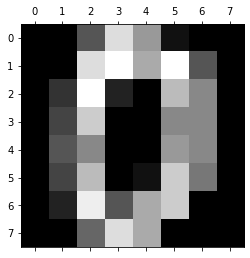

[0 1 2 ... 8 9 8]


In [ ]:
# digitsデータの読み込み
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)   # digitsデータセットは(1797, 64)ということで64（8x8）の配列が1797件あるデータセット．
# 0番目のデータの可視化
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 
print(digits.target)

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.data.reshape(-1, 1)

array([[ 0.],
       [ 0.],
       [ 5.],
       ...,
       [12.],
       [ 1.],
       [ 0.]])

In [ ]:
digits.target.reshape(-1, 1)

[[ 0.]
 [ 0.]
 [ 5.]
 ...
 [12.]
 [ 1.]
 [ 0.]]


In [ ]:
print(digits.data.reshape(-1, 1).shape)

(115008, 1)


In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
digits.target.shape

(1797,)

In [ ]:

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
n_samples = len(digits.images) # 標本数 1797個
X = digits.images.reshape((n_samples, -1))# 8x8の配列から64次元のベクトルに変換
y = digits.target
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# 学習モデルを辞書型｛名前:中身｝で保持する．Key-ValueペアとかHashMap的なものである．
ESTIMATORS = {"Perceptron": Perceptron(max_iter=40, eta0=0.1, random_state=0, shuffle=True),
              "Neural Network": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
              "Naive Bayes": GaussianNB(),
              "Decision Tree": DecisionTreeClassifier(),
              "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
              "SVM       ": SVC(gamma='auto')}



# 練習問題1-(1)
X_train = X[:-300]
X_test = X[-300:]

y_train = y[:-300]
y_test = y[-300:]

for name, clf in ESTIMATORS.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s \t accuracy:%.2f' % (name, (y_test == y_pred).sum()/len(y_test)) )


Perceptron 	 accuracy:0.89


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Neural Network 	 accuracy:0.49
Naive Bayes 	 accuracy:0.80
Decision Tree 	 accuracy:0.78
Random Forest 	 accuracy:0.78
SVM        	 accuracy:0.46


In [ ]:
# 練習問題1-(2)
import numpy as np

from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
lin_min, lin_max = X.min(), X.max()

scaler.fit(np.array([lin_min, lin_max]).reshape(-1, 1))
data_scaled = scaler.transform(X)

X_train = data_scaled[:-300]
X_test = data_scaled[-300:]

# y_train = data_scaled.target[:-300]
# y_test = data_scaled.target[-300:]

for name, clf in ESTIMATORS.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s \t accuracy:%.2f' % (name, (y_test == y_pred).sum()/len(y_test)) )



In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

ss = StandardScaler()
ss.fit(digits.data)
data_scaled = scaler.transform(digits.data).std()

X_train = data_scaled.data[:-300]
X_test = data_scaled.data[-300:]

# y_train = data_scaled.target[:-300]
# y_test = data_scaled.target[-300:]

for name, clf in ESTIMATORS.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s \t accuracy:%.2f' % (name, (y_test == y_pred).sum()/len(y_test)) )